# Neural Network Classification for Titanic Dataset Practice

## Data and DEA

In [32]:
import pandas as pd

df = pd.read_csv('data/Titanic/titanic.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [33]:
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [34]:
# change gender to binary
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

In [35]:
# Remove Name
df = df.drop(['Name'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Sex                      887 non-null    int64  
 3   Age                      887 non-null    float64
 4   Siblings/Spouses Aboard  887 non-null    int64  
 5   Parents/Children Aboard  887 non-null    int64  
 6   Fare                     887 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.6 KB


In [36]:
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [37]:
df.describe()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,0.645998,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,0.478480,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,0.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.32920


<Axes: >

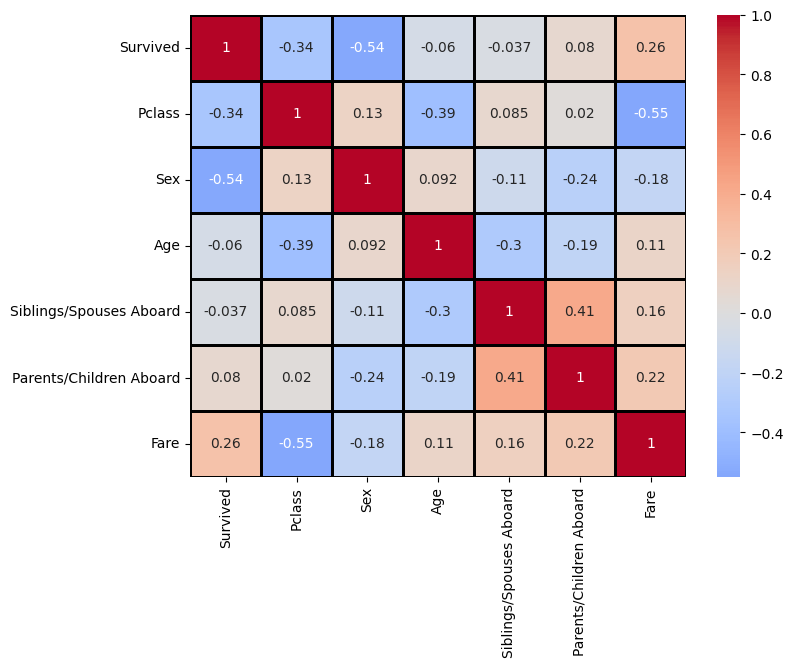

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, center=0, cmap='coolwarm', linewidths=1, linecolor='black')

In [39]:
from sklearn.model_selection import train_test_split

# Split the data into features and labels
X = df.drop(columns=['Survived'])
y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((709, 6), (178, 6), (709,), (178,))

In [40]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the min max of scaled data
print(f"Train data min: {X_train_scaled.min()}, max: {X_train_scaled.max()}")
print(f"Test data min: {X_test_scaled.min()}, max: {X_test_scaled.max()}")

Train data min: 0.0, max: 1.0
Test data min: -0.003151392915668726, max: 1.0


In [41]:
# Display the first few rows of the preprocessed dataset
print(X_train_scaled[:5])
print(y_train[:5])

[[0.5        1.         0.28148242 0.         0.         0.02537431]
 [1.         1.         0.34451027 0.25       0.         0.01546857]
 [1.         0.         0.01676541 0.5        0.33333333 0.06104473]
 [0.5        0.         0.34451027 0.         0.         0.02537431]
 [0.         0.         0.21845456 0.25       0.33333333 0.51212189]]
730    0
390    0
118    0
440    1
309    1
Name: Survived, dtype: int64


## Build the first model

In [42]:
import tensorflow as tf

# Create a TensorFlow dataset
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_scaled, y_train)).batch(32)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_scaled, y_test)).batch(32)

In [43]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train_scaled.shape[1],)),
  tf.keras.layers.Dense(1, activation="sigmoid") # for binary classification
])

# Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_dataset, epochs=20, validation_data=test_dataset)

Epoch 1/20


/mnt/d/Dev-Workspace/Python-workspace/tensorflow/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6080 - loss: 0.6365 - val_accuracy: 0.6236 - val_loss: 0.6258
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6084 - loss: 0.6231 - val_accuracy: 0.6236 - val_loss: 0.6179
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6144 - loss: 0.6120 - val_accuracy: 0.6292 - val_loss: 0.6111
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6399 - loss: 0.6017 - val_accuracy: 0.6629 - val_loss: 0.6042
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6705 - loss: 0.5913 - val_accuracy: 0.6685 - val_loss: 0.5968
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6896 - loss: 0.5808 - val_accuracy: 0.6798 - val_loss: 0.5896
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7160 - loss: 0.5702 - val_accuracy: 0.6854 - val_loss: 0.5822
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7201 - loss: 0.5593 - val_accuracy: 0.7135 - val_loss: 0.5749
Ep

## Evaluating the 1st model

In [44]:
# Evaluate the model on the test set
test_loss, test_accuracy = model_1.evaluate(test_dataset)

test_loss, test_accuracy

1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7500 - loss: 0.5148

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7291 - loss: 0.5554


(0.5285564064979553, 0.7415730357170105)

Text(0.5, 1.0, 'Model 1 accuracy and loss curves')

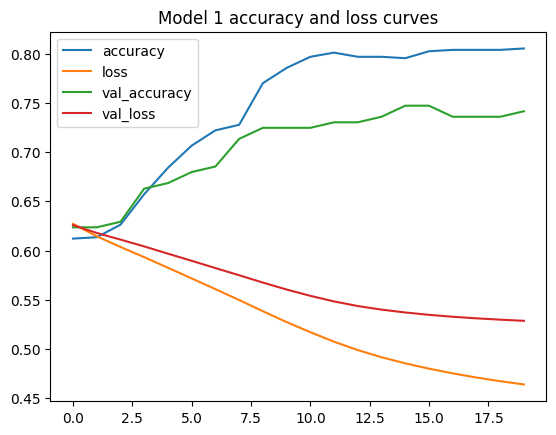

In [45]:
# Plot the accuracy and loss curves
pd.DataFrame(history_1.history).plot()
plt.title('Model 1 accuracy and loss curves')

In [46]:
# Make predictions
predictions = model_1.predict(X_test_scaled)

# Convert predictions to binary class labels
predicted_labels = (predictions > 0.5).astype(int)

# Print the first 10 predictions and their corresponding true values
for i in range(10):
    print(f"Prediction: {predicted_labels[i][0]}, True Value: {y_test.iloc[i]}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Prediction: 0, True Value: 1
Prediction: 0, True Value: 0
Prediction: 0, True Value: 0
Prediction: 0, True Value: 1
Prediction: 0, True Value: 0
Prediction: 1, True Value: 1
Prediction: 0, True Value: 0
Prediction: 0, True Value: 0
Prediction: 1, True Value: 1
Prediction: 1, True Value: 1


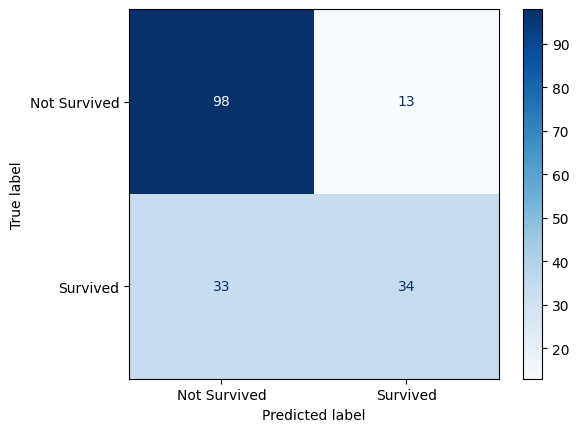

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create a confusion matrix
cm = confusion_matrix(y_test, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Survived', 'Survived'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

## Improving the model

In [48]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dropout(0.2),  # Dropout layer to prevent overfitting
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),  # Dropout layer to prevent overfitting
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100


/mnt/d/Dev-Workspace/Python-workspace/tensorflow/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.6080 - loss: 0.6485 - val_accuracy: 0.6236 - val_loss: 0.5899
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6591 - loss: 0.5642 - val_accuracy: 0.7472 - val_loss: 0.5675
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7950 - loss: 0.5238 - val_accuracy: 0.7416 - val_loss: 0.5609
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8143 - loss: 0.4869 - val_accuracy: 0.7472 - val_loss: 0.5484
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8017 - loss: 0.4834 - val_accuracy: 0.7303 - val_loss: 0.5377
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8136 - loss: 0.4635 - val_accuracy: 0.7584 - val_loss: 0.5416
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7978 - loss: 0.4618 - val_accuracy: 0.7416 - val_loss: 0.5362
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8005 - loss: 0.4424 - val_accuracy: 0.7303 - val_loss: 0.

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model_2.evaluate(test_dataset)

test_loss, test_accuracy

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7365 - loss: 0.5456 


(0.5065625905990601, 0.7696629166603088)

Text(0.5, 1.0, 'Model 2 accuracy and loss curves')

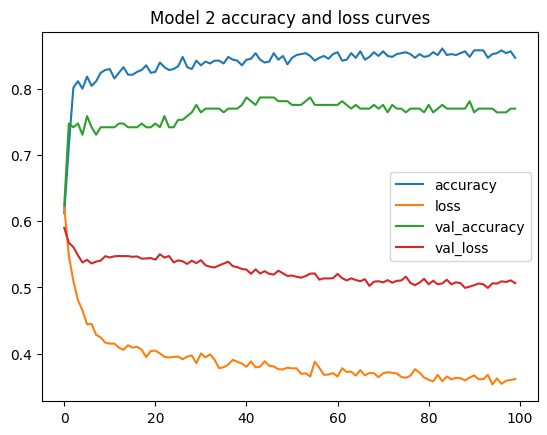

In [49]:
# Plot the accuracy and loss curves
pd.DataFrame(history_2.history).plot()
plt.title('Model 2 accuracy and loss curves')

In [50]:
# Make some predictions
predictions = model_2.predict(X_test_scaled)

# Convert predictions to binary class labels
predicted_labels = (predictions > 0.5).astype(int)

# Print the first 10 predictions and their corresponding true values
for i in range(10):
    print(f"Prediction: {predicted_labels[i][0]}, True Value: {y_test.iloc[i]}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Prediction: 0, True Value: 1
Prediction: 0, True Value: 0
Prediction: 0, True Value: 0
Prediction: 0, True Value: 1
Prediction: 0, True Value: 0
Prediction: 1, True Value: 1
Prediction: 0, True Value: 0
Prediction: 0, True Value: 0
Prediction: 1, True Value: 1
Prediction: 0, True Value: 1


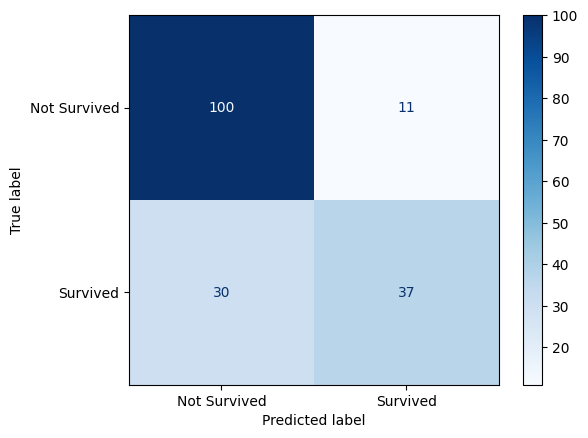

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create a confusion matrix
cm = confusion_matrix(y_test, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Survived', 'Survived'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

The neural network model performs similar as logistic regression model, ~75% accuracy.